In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# First, I have to laod different modules that I use for analyzing the data and for plotting:
import sys, os, collections
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt; plt.rcdefaults()
import re
from matplotlib.pyplot import figure
from collections import Counter

# Second, I have to load the Text Fabric app
from tf.fabric import Fabric
from tf.app import use

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
%time
BHSa2021 = use('etcbc/bhsa', version="2021", mod='CenterBLC/BHSaddons/tf')
BHSa4c = use('etcbc/bhsa', version="c", mod='CenterBLC/BHSaddons/tf')
DSS = use('etcbc/dss', hoist=globals())
NA = use("CenterBLC/NA", version="1904")

CPU times: user 1e+03 ns, sys: 1 µs, total: 2 µs
Wall time: 3.81 µs


# BOL exercises

## Vocab Selection (3 words per lemma)

In [142]:
GreekVocab=pd.read_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/0_data_NA1904/Nestle1904_source_v1.5-20220922.xlsx')
pd.set_option('display.max_columns', 50)
GreekVocab.head()

,orig_order,bol_monad_num,book_long,booknum,book_short,chapter,verse,bol_ref,word,bol_surface,normalized,lemma,bol_lemma,lemma_translit,form_tag,functional_tag,strongs,strongs_unreliable,lexeme_dict,bol_lemma_dict,gloss,bol_gloss,abc_order,bol_dict_abc,freq_lemma,...,gn,bol_gender,nu,bol_number,nu_poss,bol_possessor_number,ps,bol_person,case,bol_case,tense,bol_tense,voice,bol_voice,mood,bol_mood,degree,extra,bol_suffix,bol_verb_type,bol_noun_stem,word_stem,declension,bol_noun_declension,vocab_ReadGreekin30Days
0,1,1,Matthew,1,Matt,1,1,Matt 1:1,Βίβλος,Βίβλος,Βίβλος,βίβλος,βίβλος,biblos,N-NSF,N-NSF,976,False,"βίβλος, -ου, ἡ","βίβλος, -ου, ἡ","written book, roll, or volume","written book, roll, or volume",965,969,10,...,f,feminine,sg,singular,NaN,NaN,NaN,NaN,nom,nominative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,omicron,NaN,2nd,second_d,not_covered
1,2,2,Matthew,1,Matt,1,1,Matt 1:1,γενέσεως,γενέσεως,γενέσεως,γένεσις,γένεσις,genesis,N-GSF,N-GSF,1078,False,"γένεσις, -εως, ἡ","γένεσις, -εως, ἡ","birth, lineage","birth, lineage",1067,1070,5,...,f,feminine,sg,singular,NaN,NaN,NaN,NaN,gen,genitive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,iota,iota,3rd,third_d,not_covered
2,3,3,Matthew,1,Matt,1,1,Matt 1:1,Ἰησοῦ,Ἰησοῦ,Ἰησοῦ,Ἰησοῦς,Ἰησοῦς,Iesous,N-GSM,N-GSM,2424,False,Ἰησοῦς,Ἰησοῦς,Jesus,Jesus,2387,2399,913,...,m,masculine,sg,singular,NaN,NaN,NaN,NaN,gen,genitive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,irregular,irregular,irregular,irregular,not_covered
3,4,4,Matthew,1,Matt,1,1,Matt 1:1,Χριστοῦ,Χριστοῦ,Χριστοῦ,Χριστός,Χριστός,Khristos,N-GSM,N-GSM,5547,False,"Χριστός, -οῦ, ὁ","Χριστός, -οῦ, ὁ","anointed, Messiah, Christ","anointed, Messiah, Christ",5326,5358,529,...,m,masculine,sg,singular,NaN,NaN,NaN,NaN,gen,genitive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,omicron,NaN,2nd,second_d,not_covered
4,5,5,Matthew,5,Matt,1,1,Matt 1:1,υἱοῦ,υἱοῦ,υἱοῦ,υἱός,υἱός,uios,N-GSM,N-GSM,5207,False,"υἱός, -οῦ, ὁ","υἱός, -οῦ, ὁ","son, descendent","son, descendent",4995,5026,376,...,m,masculine,sg,singular,NaN,NaN,NaN,NaN,gen,genitive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,omicron,NaN,2nd,second_d,3b


No we only want to show the first two appearances of each word bu using the `nth` function.


See the discussion here: https://www.statology.org/pandas-first-row-of-each-group/

In [143]:
GreekVocabSelection = GreekVocab
GreekVocab.groupby('bol_lemma').nth((0,1,2)).sort_values(['bol_dict_abc'], ascending=True)

,orig_order,bol_monad_num,book_long,booknum,book_short,chapter,verse,bol_ref,word,bol_surface,normalized,lemma,lemma_translit,form_tag,functional_tag,strongs,strongs_unreliable,lexeme_dict,bol_lemma_dict,gloss,bol_gloss,abc_order,bol_dict_abc,freq_lemma,bol_lexeme_occurrences,...,gn,bol_gender,nu,bol_number,nu_poss,bol_possessor_number,ps,bol_person,case,bol_case,tense,bol_tense,voice,bol_voice,mood,bol_mood,degree,extra,bol_suffix,bol_verb_type,bol_noun_stem,word_stem,declension,bol_noun_declension,vocab_ReadGreekin30Days
bol_lemma,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Ἀαρών,68987,68987,Acts,1,Acts,7,40,Acts 7:40,Ἀαρών,Ἀαρών,Ἀαρών,Ἀαρών,Aaron,N-PRI,N-PRI,2,False,"Ἀαρών, ὁ","Ἀαρών, ὁ",Aaron,Aaron,1,1,5,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not_covered
Ἀαρών,29640,29640,Luke,1,Luke,1,5,Luke 1:5,"Ἀαρών,","Ἀαρών,",Ἀαρών,Ἀαρών,Aaron,N-PRI,N-PRI,2,False,"Ἀαρών, ὁ","Ἀαρών, ὁ",Aaron,Aaron,1,1,5,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not_covered
Ἀαρών,116633,116633,Hebrews,2,Heb,5,4,Heb 5:4,Ἀαρών.,Ἀαρών.,Ἀαρών,Ἀαρών,Aaron,N-PRI,N-PRI,2,False,"Ἀαρών, ὁ","Ἀαρών, ὁ",Aaron,Aaron,1,1,5,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not_covered
Ἀβαδδών,131566,131566,Revelation,3,Rev,9,11,Rev 9:11,Ἀβαδδών,Ἀβαδδών,Ἀβαδδών,Ἀβαδδών,Abaddon,N-PRI,N-PRI,3,False,"Ἀβαδδών, ὁ","Ἀβαδδών, ὁ",Abaddon,Abaddon,2,2,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not_covered
ἀβαρής,100462,100462,II_Corinthians,2,2Cor,11,9,2Cor 11:9,ἀβαρῆ,ἀβαρῆ,ἀβαρῆ,ἀβαρής,abares,A-ASM,A-ASM,4,False,"ἀβαρής, -ές","ἀβαρής, -ές",not burdensome,not burdensome,3,3,1,1,...,m,masculine,sg,singular,NaN,NaN,NaN,NaN,acc,accusative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not_covered
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ὠφελέω,9683,9683,Matthew,1,Matt,16,26,Matt 16:26,ὠφεληθήσεται,ὠφεληθήσεται,ὠφεληθήσεται,ὠφελέω,opheleo,V-FPI-3S,V-FPI-3S,5623,False,ὠφελέω,ὠφελέω,"help, benefit, do good","help, benefit, do good",5400,5432,15,15,...,NaN,NaN,sg,singular,NaN,NaN,p3,third_person,NaN,NaN,future,future,p,passive,ind,indicative,NaN,NaN,NaN,epsilon,NaN,epsilon,NaN,NaN,not_covered
ὠφελέω,8696,8696,Matthew,1,Matt,15,5,Matt 15:5,"ὠφεληθῇς,","ὠφεληθῇς,",ὠφεληθῇς,ὠφελέω,opheleo,V-APS-2S,V-APS-2S,5623,False,ὠφελέω,ὠφελέω,"help, benefit, do good","help, benefit, do good",5400,5432,15,15,...,NaN,NaN,sg,singular,NaN,NaN,p2,second_person,NaN,NaN,aorist,aorist,p,passive,sbj,subjunctive,NaN,NaN,NaN,epsilon,NaN,epsilon,NaN,NaN,not_covered
ὠφέλιμος,114079,114079,II_Timothy,2,2Tim,3,16,2Tim 3:16,ὠφέλιμος,ὠφέλιμος,ὠφέλιμος,ὠφέλιμος,ophelimos,A-NSM,A-NSM,5624,False,"ὠφέλιμος, -ον","ὠφέλιμος, -ον","profitable, beneficial, useful","profitable, beneficial, useful",5401,5433,4,4,...,m,masculine,sg,singular,NaN,NaN,NaN,NaN,nom,nominative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not_covered


In [144]:
list=GreekVocabSelection.groupby('bol_lemma').nth((0,1,2)).sort_values(['bol_dict_abc'], ascending=True)
list.head()

,orig_order,bol_monad_num,book_long,booknum,book_short,chapter,verse,bol_ref,word,bol_surface,normalized,lemma,lemma_translit,form_tag,functional_tag,strongs,strongs_unreliable,lexeme_dict,bol_lemma_dict,gloss,bol_gloss,abc_order,bol_dict_abc,freq_lemma,bol_lexeme_occurrences,...,gn,bol_gender,nu,bol_number,nu_poss,bol_possessor_number,ps,bol_person,case,bol_case,tense,bol_tense,voice,bol_voice,mood,bol_mood,degree,extra,bol_suffix,bol_verb_type,bol_noun_stem,word_stem,declension,bol_noun_declension,vocab_ReadGreekin30Days
bol_lemma,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Ἀαρών,68987,68987,Acts,1,Acts,7,40,Acts 7:40,Ἀαρών,Ἀαρών,Ἀαρών,Ἀαρών,Aaron,N-PRI,N-PRI,2,False,"Ἀαρών, ὁ","Ἀαρών, ὁ",Aaron,Aaron,1,1,5,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not_covered
Ἀαρών,29640,29640,Luke,1,Luke,1,5,Luke 1:5,"Ἀαρών,","Ἀαρών,",Ἀαρών,Ἀαρών,Aaron,N-PRI,N-PRI,2,False,"Ἀαρών, ὁ","Ἀαρών, ὁ",Aaron,Aaron,1,1,5,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not_covered
Ἀαρών,116633,116633,Hebrews,2,Heb,5,4,Heb 5:4,Ἀαρών.,Ἀαρών.,Ἀαρών,Ἀαρών,Aaron,N-PRI,N-PRI,2,False,"Ἀαρών, ὁ","Ἀαρών, ὁ",Aaron,Aaron,1,1,5,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not_covered
Ἀβαδδών,131566,131566,Revelation,3,Rev,9,11,Rev 9:11,Ἀβαδδών,Ἀβαδδών,Ἀβαδδών,Ἀβαδδών,Abaddon,N-PRI,N-PRI,3,False,"Ἀβαδδών, ὁ","Ἀβαδδών, ὁ",Abaddon,Abaddon,2,2,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not_covered
ἀβαρής,100462,100462,II_Corinthians,2,2Cor,11,9,2Cor 11:9,ἀβαρῆ,ἀβαρῆ,ἀβαρῆ,ἀβαρής,abares,A-ASM,A-ASM,4,False,"ἀβαρής, -ές","ἀβαρής, -ές",not burdensome,not burdensome,3,3,1,1,...,m,masculine,sg,singular,NaN,NaN,NaN,NaN,acc,accusative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not_covered


In [145]:
list.to_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_NTST551-2_Greek/BOL_exercises/GreekVocabMonadSelection.xlsx')

# Morphology

Lets first get the data:

In [5]:
words=pd.read_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/0_data_NA1904/Nestle1904_source_v1.5_20221004.xlsx')
pd.set_option('display.max_columns', 60)
words.head()

,book_long,booknum,book_short,chapter,verse,bol_ref,orig_order,bol_monad_num,word,bol_surface,normalized,normalized_noaccent,lemma,bol_lemma,lemma_noaccent,lemma_translit,form_tag,functional_tag,strongs,strongs_unreliable,lexeme_dict,bol_lemma_dict,gloss,bol_gloss,abc_order,bol_dict_abc,freq_lemma,bol_lexeme_occurrences,bol_frequency_rank,sp,...,ambigious_gn2,ambigious_gn3,bol_gender,nu,bol_number,nu_poss,bol_possessor_number,ps,bol_person,case,ambigious_case2,ambigious_case3,bol_case,tense,bol_tense,voice,ambigious_voice2,ambigious_voice3,bol_voice,mood,bol_mood,degree,extra,bol_suffix,bol_verb_type,bol_noun_stem,word_stem,declension,bol_noun_declension,vocab_ReadGreekIn30Days
0,Matthew,1,Matt,1,1,Matt 1:1,1,1,Βίβλος,Βίβλος,Βίβλος,Βιβλος,βίβλος,βίβλος,βιβλος,biblos,N-NSF,N-NSF,976,False,"βίβλος, -ου, ἡ","βίβλος, -ου, ἡ","written book, roll, or volume","written book, roll, or volume",965,969,10,10,1052,noun,...,NaN,NaN,feminine,sg,singular,NaN,NaN,NaN,NaN,nom,NaN,NaN,nominative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,omicron,NaN,2nd,second_d,not_covered
1,Matthew,1,Matt,1,1,Matt 1:1,2,2,γενέσεως,γενέσεως,γενέσεως,γενεσεως,γένεσις,γένεσις,γενεσις,genesis,N-GSF,N-GSF,1078,False,"γένεσις, -εως, ἡ","γένεσις, -εως, ἡ","birth, lineage","birth, lineage",1067,1070,5,5,1638,noun,...,NaN,NaN,feminine,sg,singular,NaN,NaN,NaN,NaN,gen,NaN,NaN,genitive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,iota,iota,3rd,third_d,not_covered
2,Matthew,1,Matt,1,1,Matt 1:1,3,3,Ἰησοῦ,Ἰησοῦ,Ἰησοῦ,Ιησου,Ἰησοῦς,Ἰησοῦς,Ιησους,Iesous,N-GSM,N-GSM,2424,False,Ἰησοῦς,Ἰησοῦς,Jesus,Jesus,2387,2399,913,913,19,noun,...,NaN,NaN,masculine,sg,singular,NaN,NaN,NaN,NaN,gen,NaN,NaN,genitive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,irregular,irregular,irregular,irregular,not_covered
3,Matthew,1,Matt,1,1,Matt 1:1,4,4,Χριστοῦ,Χριστοῦ,Χριστοῦ,Χριστου,Χριστός,Χριστός,Χριστος,Khristos,N-GSM,N-GSM,5547,False,"Χριστός, -οῦ, ὁ","Χριστός, -οῦ, ὁ","anointed, Messiah, Christ","anointed, Messiah, Christ",5326,5358,529,529,35,noun,...,NaN,NaN,masculine,sg,singular,NaN,NaN,NaN,NaN,gen,NaN,NaN,genitive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,omicron,NaN,2nd,second_d,not_covered
4,Matthew,1,Matt,1,1,Matt 1:1,5,5,υἱοῦ,υἱοῦ,υἱοῦ,υιου,υἱός,υἱός,υιος,uios,N-GSM,N-GSM,5207,False,"υἱός, -οῦ, ὁ","υἱός, -οῦ, ὁ","son, descendent","son, descendent",4995,5026,376,376,47,noun,...,NaN,NaN,masculine,sg,singular,NaN,NaN,NaN,NaN,gen,NaN,NaN,genitive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,omicron,NaN,2nd,second_d,3b


## Verb conjugation exercise material

In [147]:
BOL_VConjg = words[
                            (words['vocab_ReadGreekin30Days'] != 'not_covered') 
                           &(words['bol_psp'] == 'verb') 
                          ]
pd.set_option('display.max_columns', 60)
BOL_VConjg.head()


,orig_order,bol_monad_num,book_long,booknum,book_short,chapter,verse,bol_ref,word,bol_surface,normalized,lemma,bol_lemma,lemma_translit,form_tag,functional_tag,strongs,strongs_unreliable,lexeme_dict,bol_lemma_dict,gloss,bol_gloss,abc_order,bol_dict_abc,freq_lemma,bol_lexeme_occurrences,bol_frequency_rank,sp,bol_psp,gn,bol_gender,nu,bol_number,nu_poss,bol_possessor_number,ps,bol_person,case,bol_case,tense,bol_tense,voice,bol_voice,mood,bol_mood,degree,extra,bol_suffix,bol_verb_type,bol_noun_stem,word_stem,declension,bol_noun_declension,vocab_ReadGreekin30Days
9,10,10,Matthew,14,Matt,1,2,Matt 1:2,ἐγέννησεν,ἐγέννησεν,ἐγέννησεν,γεννάω,γεννάω,gennao,V-AAI-3S,V-AAI-3S,1080,False,γεννάω,γεννάω,"beget, bring forth, give birth to","beget, bring forth, give birth to",1069,1072,97,97,170,verb,verb,NaN,NaN,sg,singular,NaN,NaN,p3,third_person,NaN,NaN,aorist,aorist,a,active,ind,indicative,NaN,NaN,NaN,alpha,NaN,alpha,NaN,NaN,6a
14,15,15,Matthew,14,Matt,1,2,Matt 1:2,ἐγέννησεν,ἐγέννησεν,ἐγέννησεν,γεννάω,γεννάω,gennao,V-AAI-3S,V-AAI-3S,1080,False,γεννάω,γεννάω,"beget, bring forth, give birth to","beget, bring forth, give birth to",1069,1072,97,97,170,verb,verb,NaN,NaN,sg,singular,NaN,NaN,p3,third_person,NaN,NaN,aorist,aorist,a,active,ind,indicative,NaN,NaN,NaN,alpha,NaN,alpha,NaN,NaN,6a
19,20,20,Matthew,14,Matt,1,2,Matt 1:2,ἐγέννησεν,ἐγέννησεν,ἐγέννησεν,γεννάω,γεννάω,gennao,V-AAI-3S,V-AAI-3S,1080,False,γεννάω,γεννάω,"beget, bring forth, give birth to","beget, bring forth, give birth to",1069,1072,97,97,170,verb,verb,NaN,NaN,sg,singular,NaN,NaN,p3,third_person,NaN,NaN,aorist,aorist,a,active,ind,indicative,NaN,NaN,NaN,alpha,NaN,alpha,NaN,NaN,6a
28,29,29,Matthew,14,Matt,1,3,Matt 1:3,ἐγέννησεν,ἐγέννησεν,ἐγέννησεν,γεννάω,γεννάω,gennao,V-AAI-3S,V-AAI-3S,1080,False,γεννάω,γεννάω,"beget, bring forth, give birth to","beget, bring forth, give birth to",1069,1072,97,97,170,verb,verb,NaN,NaN,sg,singular,NaN,NaN,p3,third_person,NaN,NaN,aorist,aorist,a,active,ind,indicative,NaN,NaN,NaN,alpha,NaN,alpha,NaN,NaN,6a
39,40,40,Matthew,14,Matt,1,3,Matt 1:3,ἐγέννησεν,ἐγέννησεν,ἐγέννησεν,γεννάω,γεννάω,gennao,V-AAI-3S,V-AAI-3S,1080,False,γεννάω,γεννάω,"beget, bring forth, give birth to","beget, bring forth, give birth to",1069,1072,97,97,170,verb,verb,NaN,NaN,sg,singular,NaN,NaN,p3,third_person,NaN,NaN,aorist,aorist,a,active,ind,indicative,NaN,NaN,NaN,alpha,NaN,alpha,NaN,NaN,6a


In [148]:
BOL_VConjg=BOL_VConjg \
                                    .groupby(['bol_verb_type',
                                              'bol_tense',
                                              'bol_mood',
                                              'bol_voice',
                                              'bol_person'
                                             ]) \
                                    .nth((0,1)) \
                                    .sort_values(['bol_verb_type',
                                                  'bol_tense',
                                                  'bol_mood',
                                                  'bol_voice',
                                                  'bol_person',
                                                  'bol_monad_num'],
                                                 ascending=[True,True,True,True,True,True])
BOL_VConjg.head(50)

orig_order  \
bol_verb_type bol_tense bol_mood    bol_voice       bol_person                  
alpha         aorist    imperative  active          second_person       56246   
                                                    second_person       56285   
                                    middle_deponent second_person       51520   
                        indicative  active          first_person        59683   
                                                    first_person        60495   
                                                    second_person       61843   
                                                    second_person       61847   
                                                    third_person           10   
                                                    third_person           15   
                                    middle_deponent first_person        49208   
                                                    first_person       124903   
                                                    second_person       64884   
                                                    third_person        33489   
                                                    third_person        48193   
                                    passive         first_person        55523   
                                                    first_person        65301   
                                                    second_person       56453   
                                                    third_person          242   
                                                    third_person         9801   
                        subjunctive active          first_person        47316   
                                                    second_person        2430   
                                                    third_person        49304   
                                                    third_person        61178   
                                    passive         third_person        50347   
                                                    third_person        50388   
              future    indicative  active          first_person        12422   
                                                    first_person        25904   
                                                    second_person        2381   
                                                    second_person       11234   
                                                    third_person         2923   
                                                    third_person        29763   
                                    middle_deponent first_person        61203   
                                                    first_person       120356   
                                                    second_person       16785   
                                                    second_person       17025   
                                                    third_person         1725   
                                                    third_person        14614   
                                    passive         first_person        81422   
                                                    third_person        60126   
                                                    third_person       118338   
              imperfect indicative  active          second_person       55539   
                                                    second_person       60274   
                                                    third_person         8940   
                                                    third_person         9418   
              perfect   indicative  active          first_person        49547   
                                                    first_person        50485   
                                                    second_person       52551   
                                                    second_person       53312   
                 

In [149]:
BOL_VConjg.to_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_NTST551-2_Greek/BOL_VerbConjugation_Teresa_selection.xlsx')

### Week07 morphology verbs

Analyze verbal forms (only words from the sections 3a-6b are being used; ειμι, οραω, and οιδα are excluded).

All presented forms are restricted to:

- tense: present, imperfect, aorist, future, perfect
- mood: indicative
- voice:
    - active
    - middle-or-passive (in present or imperfect where one cannot distinguish morphologicaly between middle and passive)
    - middle (in aorist or future tense where one can distinguish morphologicaly between middle and passive)
    - passive (in aorist or future tense where one can distinguish morphologicaly between middle and passive)
    - middle-or-passive deponent (in present or imperfect where one cannot distinguish morphologicaly between middle and passive)
    - middle deponent (in aorist or future tense where one can distinguish morphologicaly between middle and passive)
    - passive deponent (in aorist or future tense where one can distinguish morphologicaly between middle and passive)



In [26]:
Search0 = '''
word bol_psp=verb lemma_translit#eimi|oida|orao bol_tense=present|imperfect|aorist|future|perfect bol_mood=indicative bol_voice=active|middle_or_passive|middle|passive|middle_or_passive_deponent|middle_deponent|passive_deponent bol_monad_num bol_nu bol_person vocab_ReadGreekIn30Days=3a|3b|4a|4b|5a|5b|6a|6b bol_lemma
'''
Search0 = NA.search(Search0)
NA.show(Search0, start=1, end=3, condensed=True, colorMap={1:'pink'}, extraFeatures={'abc_order', 'bol_case', 'bol_dict_abc', 'bol_frequency_rank', 'bol_gloss', 'bol_gn', 'bol_lemma', 'bol_lemma_dict', 'bol_lexeme_dict', 'bol_lexeme_occurence', 'bol_monad_num', 'bol_mood', 'bol_noun_declension', 'bol_noun_stem', 'bol_noun_type', 'bol_nu', 'bol_person', 'bol_possessor_number', 'bol_psp', 'bol_ref', 'bol_stem', 'bol_suffix', 'bol_surface', 'bol_tense', 'bol_verb_type', 'bol_voice', 'book', 'book_code', 'book_short', 'bookshort', 'case', 'chapter', 'clause', 'declension', 'degree', 'extra', 'freq_lemma', 'gloss', 'gn', 'lemma', 'lemma_translit', 'lexeme_dict', 'mood', 'morph_form', 'morph_functional', 'normalized', 'nu', 'nu_poss', 'orig_order', 'ps', 'sentence', 'sp', 'strongs', 'tense', 'verse', 'vocab_ReadGreekIn30Days', 'voice', 'word'})

  0.19s 3668 results


In [27]:
NA.export(Search0, toDir='/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_NTST551-2_Greek', toFile='BOL_MorphVerb_W07.tsv')

In [28]:
BOL_VConjg_W07=pd.read_csv('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_NTST551-2_Greek/BOL_MorphVerb_W07.tsv', delimiter='\t',encoding='utf-16')
pd.set_option('display.max_columns', 60)
BOL_VConjg_W07.head()

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,bol_lemma1,bol_monad_num1,bol_mood1,bol_nu1,bol_person1,bol_psp1,bol_tense1,bol_voice1,lemma_translit1,vocab_ReadGreekIn30Days1
0,1,Matthew,1,2,10,word,ἐγέννησεν,γεννάω,10,indicative,singular,third_person,verb,aorist,active,gennao,6a
1,2,Matthew,1,2,15,word,ἐγέννησεν,γεννάω,15,indicative,singular,third_person,verb,aorist,active,gennao,6a
2,3,Matthew,1,2,20,word,ἐγέννησεν,γεννάω,20,indicative,singular,third_person,verb,aorist,active,gennao,6a
3,4,Matthew,1,3,29,word,ἐγέννησεν,γεννάω,29,indicative,singular,third_person,verb,aorist,active,gennao,6a
4,5,Matthew,1,3,40,word,ἐγέννησεν,γεννάω,40,indicative,singular,third_person,verb,aorist,active,gennao,6a


array([<AxesSubplot:ylabel='R'>], dtype=object)

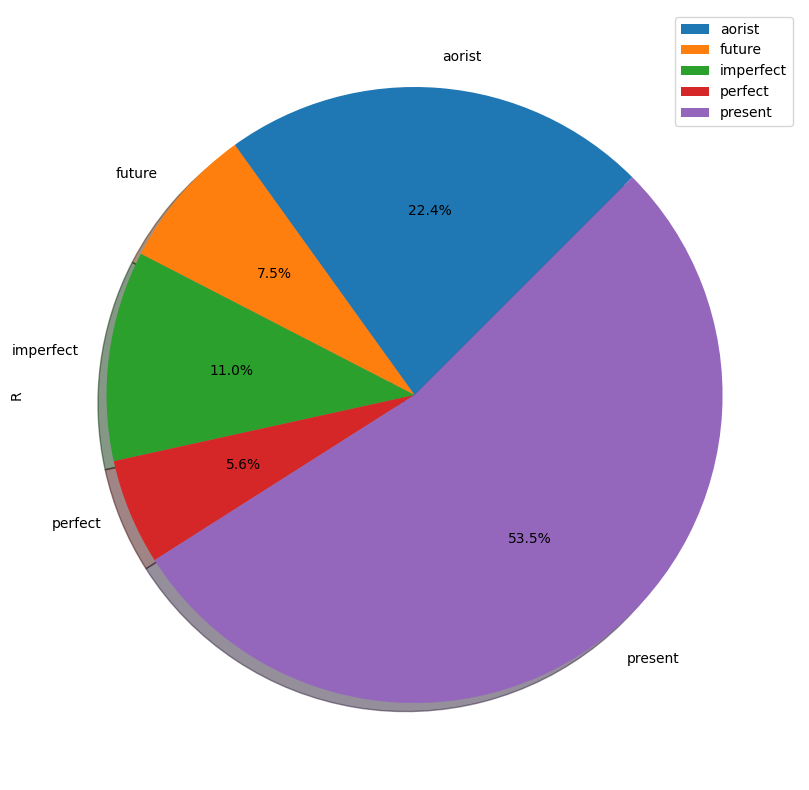

In [29]:
BOL_VConjg_W07.groupby(['bol_tense1']).sum().plot(kind='pie', y='R', subplots=True, shadow = True,startangle=45,figsize=(15,10), autopct='%1.1f%%')

In [30]:
BOL_VConjg_W07=BOL_VConjg_W07 \
                                    .groupby(['bol_mood1',
                                              'bol_tense1',
                                              'bol_voice1',
                                              'bol_person1',
                                              'bol_nu1'
                                             ]) \
                                    .nth((0,1,2,3)) \
                                    .sort_values([
                                                  'bol_tense1',
                                                  'bol_voice1',
                                                  'bol_person1',
                                                  'bol_nu1',   
                                                  'bol_monad_num1'],
                                                 ascending=[True,True,True,True,True])
BOL_VConjg_W07.head(60)

R  \
bol_mood1  bol_tense1 bol_voice1      bol_person1   bol_nu1          
indicative aorist     active          first_person  plural     122   
                                                    plural     935   
                                                    plural    1044   
                                                    plural    1408   
                                                    singular    50   
                                                    singular  1435   
                                                    singular  1568   
                                                    singular  1578   
                                      second_person plural      80   
                                                    plural      85   
                                                    plural      89   
                                                    plural      92   
                                                    singular   328   
                                                    singular   356   
                                                    singular  1019   
                                                    singular  1249   
                                      third_person  plural     144   
                                                    plural     197   
                                                    plural     233   
                                                    plural     239   
                                                    singular     1   
                                                    singular     2   
                                                    singular     3   
                                                    singular     4   
                      middle          first_person  singular  2326   
                      middle_deponent first_person  plural    1438   
                                                    plural    2619   
                                                    plural    3323   
                                                    singular  2567   
                                                    singular  2595   
                                      second_person plural    2331   
                                                    plural    2358   
                                                    plural    2359   
                                                    plural    2938   
                                                    singular  1180   
                                                    singular  2375   
                                                    singular  3494   
                                                    singular  3522   
                                      third_person  plural     216   
                                                    plural     440   
                                                    plural     733   
                                                    plural     907   
                                                    singular   281   
                                                    singular   484   
                                                    singular   486   
                                                    singular   500   
                      passive         first_person  plural    1799   
                                                    plural    2336   
                                                    plural    2616   
                                                    plural    3098   
                                                    singular  2990   
                                      second_person plural    2739   
                                                    plural    3013   
                                                    plural    3030   
                                                    plural    3031   
                                                    singular  1871   
     

In [31]:
BOL_VConjg_W07.to_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_NTST551-2_Greek/BOL_MorphVerb_Week07.xlsx')

In [22]:
BOL_VConjg_W07 = words[
                            (words['vocab_ReadGreekIn30Days'] == '3a') 
                             &(words['bol_psp'] == 'verb') 
                             &(words['bol_tense'] == 'present','imperfect')
                           |(words['vocab_ReadGreekIn30Days'] == '3b') 
                             &(words['bol_psp'] == 'verb') 
                           |(words['vocab_ReadGreekIn30Days'] == '4a') 
                             &(words['bol_psp'] == 'verb') 
                           |(words['vocab_ReadGreekIn30Days'] == '4b') 
                             &(words['bol_psp'] == 'verb') 
                           |(words['vocab_ReadGreekIn30Days'] == '5a') 
                             &(words['bol_psp'] == 'verb') 
                           |(words['vocab_ReadGreekIn30Days'] == '5b') 
                             &(words['bol_psp'] == 'verb') 
                           |(words['vocab_ReadGreekIn30Days'] == '6a') 
                             &(words['bol_psp'] == 'verb') 
                           |(words['vocab_ReadGreekIn30Days'] == '6b') 
                             &(words['bol_psp'] == 'verb') 
                          # |(words['vocab_ReadGreekIn30Days'] == '6c') 
                          #   &(words['bol_psp'] == 'verb') 
                          # |(words['vocab_ReadGreekIn30Days'] == '7a') 
                          #   &(words['bol_psp'] == 'verb') 
                          # |(words['vocab_ReadGreekIn30Days'] == '7b') 
                          #   &(words['bol_psp'] == 'verb') 
                          # |(words['vocab_ReadGreekIn30Days'] == '7c') 
                          #   &(words['bol_psp'] == 'verb') 
                          # |(words['vocab_ReadGreekIn30Days'] == '7d') 
                          #   &(words['bol_psp'] == 'verb') 
                          # |(words['vocab_ReadGreekIn30Days'] == '8a') 
                          #   &(words['bol_psp'] == 'verb')     
                          # |(words['vocab_ReadGreekIn30Days'] == '8b') 
                          #   &(words['bol_psp'] == 'verb') 
                          # |(words['vocab_ReadGreekIn30Days'] == '9a') 
                          #   &(words['bol_psp'] == 'verb')    
                          ]
pd.set_option('display.max_columns', 60)
BOL_VConjg_W07.head()


ValueError: setting an array element with a sequence.

array([<AxesSubplot:ylabel='orig_order'>], dtype=object)

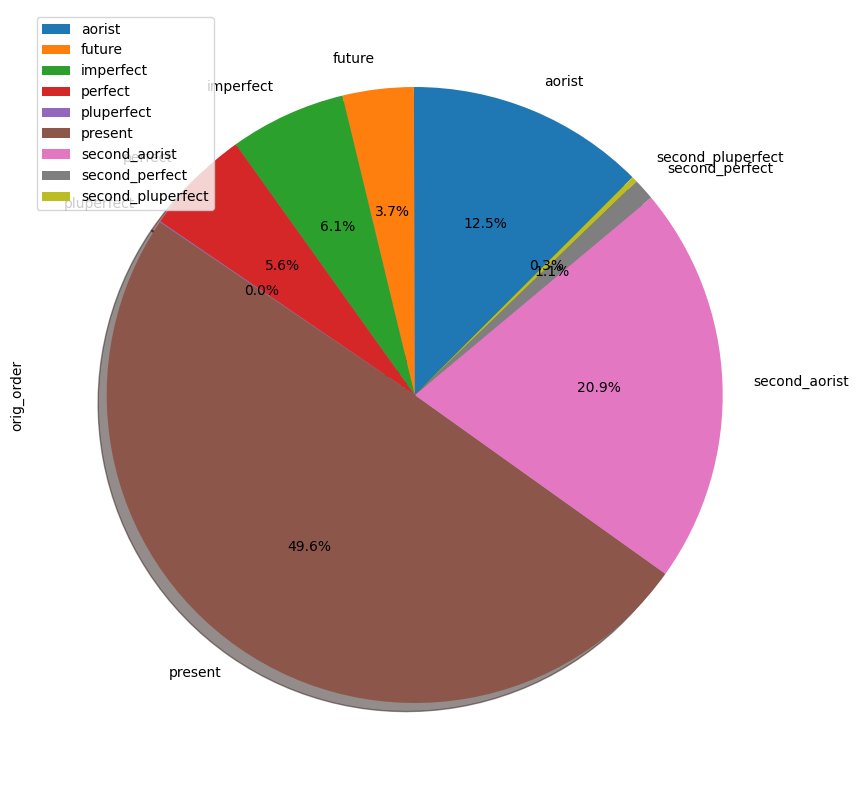

In [19]:
BOL_VConjg_W07.groupby(['bol_tense']).sum().plot(kind='pie', y='orig_order', subplots=True, shadow = True,startangle=45,figsize=(15,10), autopct='%1.1f%%')

## Noun declension exercise material

In [150]:
pd.set_option('display.max_columns', 60)
words.head()

,orig_order,bol_monad_num,book_long,booknum,book_short,chapter,verse,bol_ref,word,bol_surface,normalized,lemma,bol_lemma,lemma_translit,form_tag,functional_tag,strongs,strongs_unreliable,lexeme_dict,bol_lemma_dict,gloss,bol_gloss,abc_order,bol_dict_abc,freq_lemma,bol_lexeme_occurrences,bol_frequency_rank,sp,bol_psp,gn,bol_gender,nu,bol_number,nu_poss,bol_possessor_number,ps,bol_person,case,bol_case,tense,bol_tense,voice,bol_voice,mood,bol_mood,degree,extra,bol_suffix,bol_verb_type,bol_noun_stem,word_stem,declension,bol_noun_declension,vocab_ReadGreekin30Days
0,1,1,Matthew,1,Matt,1,1,Matt 1:1,Βίβλος,Βίβλος,Βίβλος,βίβλος,βίβλος,biblos,N-NSF,N-NSF,976,False,"βίβλος, -ου, ἡ","βίβλος, -ου, ἡ","written book, roll, or volume","written book, roll, or volume",965,969,10,10,1052,noun,noun,f,feminine,sg,singular,NaN,NaN,NaN,NaN,nom,nominative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,omicron,NaN,2nd,second_d,not_covered
1,2,2,Matthew,1,Matt,1,1,Matt 1:1,γενέσεως,γενέσεως,γενέσεως,γένεσις,γένεσις,genesis,N-GSF,N-GSF,1078,False,"γένεσις, -εως, ἡ","γένεσις, -εως, ἡ","birth, lineage","birth, lineage",1067,1070,5,5,1638,noun,noun,f,feminine,sg,singular,NaN,NaN,NaN,NaN,gen,genitive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,iota,iota,3rd,third_d,not_covered
2,3,3,Matthew,1,Matt,1,1,Matt 1:1,Ἰησοῦ,Ἰησοῦ,Ἰησοῦ,Ἰησοῦς,Ἰησοῦς,Iesous,N-GSM,N-GSM,2424,False,Ἰησοῦς,Ἰησοῦς,Jesus,Jesus,2387,2399,913,913,19,noun,noun,m,masculine,sg,singular,NaN,NaN,NaN,NaN,gen,genitive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,irregular,irregular,irregular,irregular,not_covered
3,4,4,Matthew,1,Matt,1,1,Matt 1:1,Χριστοῦ,Χριστοῦ,Χριστοῦ,Χριστός,Χριστός,Khristos,N-GSM,N-GSM,5547,False,"Χριστός, -οῦ, ὁ","Χριστός, -οῦ, ὁ","anointed, Messiah, Christ","anointed, Messiah, Christ",5326,5358,529,529,35,noun,noun,m,masculine,sg,singular,NaN,NaN,NaN,NaN,gen,genitive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,omicron,NaN,2nd,second_d,not_covered
4,5,5,Matthew,5,Matt,1,1,Matt 1:1,υἱοῦ,υἱοῦ,υἱοῦ,υἱός,υἱός,uios,N-GSM,N-GSM,5207,False,"υἱός, -οῦ, ὁ","υἱός, -οῦ, ὁ","son, descendent","son, descendent",4995,5026,376,376,47,noun,noun,m,masculine,sg,singular,NaN,NaN,NaN,NaN,gen,genitive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,omicron,NaN,2nd,second_d,3b


In [153]:
BOL_NDecl = words[
                            (words['vocab_ReadGreekin30Days'] != 'not_covered') 
                           &(words['bol_psp'] == 'noun') 
                          ]
pd.set_option('display.max_columns', 60)
BOL_NDecl.head()

,orig_order,bol_monad_num,book_long,booknum,book_short,chapter,verse,bol_ref,word,bol_surface,normalized,lemma,bol_lemma,lemma_translit,form_tag,functional_tag,strongs,strongs_unreliable,lexeme_dict,bol_lemma_dict,gloss,bol_gloss,abc_order,bol_dict_abc,freq_lemma,bol_lexeme_occurrences,bol_frequency_rank,sp,bol_psp,gn,bol_gender,nu,bol_number,nu_poss,bol_possessor_number,ps,bol_person,case,bol_case,tense,bol_tense,voice,bol_voice,mood,bol_mood,degree,extra,bol_suffix,bol_verb_type,bol_noun_stem,word_stem,declension,bol_noun_declension,vocab_ReadGreekin30Days
4,5,5,Matthew,5,Matt,1,1,Matt 1:1,υἱοῦ,υἱοῦ,υἱοῦ,υἱός,υἱός,uios,N-GSM,N-GSM,5207,False,"υἱός, -οῦ, ὁ","υἱός, -οῦ, ὁ","son, descendent","son, descendent",4995,5026,376,376,47,noun,noun,m,masculine,sg,singular,NaN,NaN,NaN,NaN,gen,genitive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,omicron,NaN,2nd,second_d,3b
6,7,7,Matthew,5,Matt,1,1,Matt 1:1,υἱοῦ,υἱοῦ,υἱοῦ,υἱός,υἱός,uios,N-GSM,N-GSM,5207,False,"υἱός, -οῦ, ὁ","υἱός, -οῦ, ὁ","son, descendent","son, descendent",4995,5026,376,376,47,noun,noun,m,masculine,sg,singular,NaN,NaN,NaN,NaN,gen,genitive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,omicron,NaN,2nd,second_d,3b
24,25,25,Matthew,14,Matt,1,2,Matt 1:2,ἀδελφοὺς,ἀδελφοὺς,ἀδελφούς,ἀδελφός,ἀδελφός,adelphos,N-APM,N-APM,80,False,"ἀδελφός, -οῦ, ὁ","ἀδελφός, -οῦ, ὁ",brother,brother,79,79,343,343,49,noun,noun,m,masculine,pl,plural,NaN,NaN,NaN,NaN,acc,accusative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,omicron,NaN,2nd,second_d,6a
89,90,90,Matthew,8,Matt,1,6,Matt 1:6,βασιλέα.,βασιλέα.,βασιλέα,βασιλεύς,βασιλεύς,basileus,N-ASM,N-ASM,935,False,"βασιλεύς, -έως, ὁ","βασιλεύς, -έως, ὁ","king, ruler, emperor","king, ruler, emperor",924,928,115,115,143,noun,noun,m,masculine,sg,singular,NaN,NaN,NaN,NaN,acc,accusative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,epsilon_upsilon,epsilon_upsilon,3rd,third_d,4b
166,167,167,Matthew,14,Matt,1,11,Matt 1:11,ἀδελφοὺς,ἀδελφοὺς,ἀδελφούς,ἀδελφός,ἀδελφός,adelphos,N-APM,N-APM,80,False,"ἀδελφός, -οῦ, ὁ","ἀδελφός, -οῦ, ὁ",brother,brother,79,79,343,343,49,noun,noun,m,masculine,pl,plural,NaN,NaN,NaN,NaN,acc,accusative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,omicron,NaN,2nd,second_d,6a


In [154]:
BOL_NDecl=BOL_NDecl \
                                    .groupby(['bol_noun_declension',
                                              'bol_case',
                                              'bol_number',
                                              'bol_gender',
                                             ]) \
                                    .nth((0,1)) \
                                    .sort_values(['bol_noun_declension',
                                                  'bol_case',
                                                  'bol_number',
                                                  'bol_gender',
                                                  'bol_monad_num'],
                                                 ascending=[True,False,False,False,True])
BOL_NDecl.head(100)

orig_order  \
bol_noun_declension bol_case   bol_number bol_gender               
first_alpha_breve   nominative singular   feminine          4083   
                                          feminine         20766   
                               plural     feminine         65218   
                                          feminine         95139   
                    genitive   singular   feminine          1445   
...                                                          ...   
irregular           accusative singular   masculine          238   
                                          masculine        21814   
                                          feminine           338   
                                          feminine           421   
                               plural     masculine        37197   

                                                      bol_monad_num  \
bol_noun_declension bol_case   bol_number bol_gender                  
first_alpha_breve   nominative singular   feminine             4083   
                                          feminine            20766   
                               plural     feminine            65218   
                                          feminine            95139   
                    genitive   singular   feminine             1445   
...                                                             ...   
irregular           accusative singular   masculine             238   
                                          masculine           21814   
                                          feminine              338   
                                          feminine              421   
                               plural     masculine           37197   

                                                          book_long  booknum  \
bol_noun_declension bol_case   bol_number bol_gender                           
first_alpha_breve   nominative singular   feminine          Matthew        5   
                                          feminine             Mark        5   
                               plural     feminine             Acts       27   
                                          feminine    I_Corinthians       27   
                    genitive   singular   feminine          Matthew        5   
...                                                             ...      ...   
irregular           accusative singular   masculine         Matthew        8   
                                          masculine            Mark        8   
                                          feminine          Matthew        8   
                                          feminine          Matthew        8   
                               plural     masculine            Luke        9   

                                                     book_short  chapter  \
bol_noun_declension bol_case   bol_number bol_gender                       
first_alpha_breve   nominative singular   feminine         Matt        8   
                                          feminine         Mark        4   
                               plural     feminine         Acts        2   
                                          feminine         1Cor       13   
                    genitive   singular   feminine         Matt        4   
...                                                         ...      ...   
irregular           accusative singular   masculine        Matt        1   
                                          masculine        Mark        6   
                                          feminine         Matt        1   
                                          feminine         Matt        1   
                               plural     masculine        Luke        9   

                                                      verse    bol_ref  \
bol_noun_declension bol_case   bol_number bol_gender                     
first_alpha_breve   nominative singular   feminine       27  Matt 8

In [155]:
BOL_NDecl.to_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_NTST551-2_Greek/BOL_NounDeclension_Teresa_selection.xlsx')

### Week07 morphology nouns and adjectives

Nominal Declension exercise restricted to the vocabulary of Larry Richards' textbook up to section 6b. Irregular and indeclinable forms are removed. Only the following cases will be presented:
- nominative
- genitive
- dative
- accusative



In [5]:
Search0 = '''
word bol_psp=noun|adj bol_monad_num bol_case=nominative|genitive|dative|accusative bol_nu bol_gn bol_noun_stem#irregular|indeclinable vocab_ReadGreekIn30Days=3a|3b|4a|4b|5a|5b|6a|6b bol_lemma
'''
Search0 = NA.search(Search0)
NA.show(Search0, start=1, end=3, condensed=True, colorMap={1:'pink'}, extraFeatures={'abc_order', 'bol_case', 'bol_dict_abc', 'bol_frequency_rank', 'bol_gloss', 'bol_gn', 'bol_lemma', 'bol_lemma_dict', 'bol_lexeme_dict', 'bol_lexeme_occurence', 'bol_monad_num', 'bol_mood', 'bol_noun_declension', 'bol_noun_stem', 'bol_noun_type', 'bol_nu', 'bol_person', 'bol_possessor_number', 'bol_psp', 'bol_ref', 'bol_stem', 'bol_suffix', 'bol_surface', 'bol_tense', 'bol_verb_type', 'bol_voice', 'book', 'book_code', 'book_short', 'bookshort', 'case', 'chapter', 'clause', 'declension', 'degree', 'extra', 'freq_lemma', 'gloss', 'gn', 'lemma', 'lemma_translit', 'lexeme_dict', 'mood', 'morph_form', 'morph_functional', 'normalized', 'nu', 'nu_poss', 'orig_order', 'ps', 'sentence', 'sp', 'strongs', 'tense', 'verse', 'vocab_ReadGreekIn30Days', 'voice', 'word'})

  0.28s 13420 results


In [6]:
NA.export(Search0, toDir='/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_NTST551-2_Greek', toFile='BOL_MorphNoun_W07.tsv')

In [7]:
BOL_NConjg_W07=pd.read_csv('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_NTST551-2_Greek/BOL_MorphNoun_W07.tsv', delimiter='\t',encoding='utf-16')
pd.set_option('display.max_columns', 60)
BOL_NConjg_W07.head(20)

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,bol_case1,bol_gn1,bol_lemma1,bol_monad_num1,bol_noun_stem1,bol_nu1,bol_psp1,vocab_ReadGreekIn30Days1
0,1,Matthew,1,1,5,word,υἱοῦ,genitive,masculine,υἱός,5,omicron,singular,noun,3b
1,2,Matthew,1,1,7,word,υἱοῦ,genitive,masculine,υἱός,7,omicron,singular,noun,3b
2,3,Matthew,1,2,25,word,ἀδελφοὺς,accusative,masculine,ἀδελφός,25,omicron,plural,noun,6a
3,4,Matthew,1,6,90,word,βασιλέα.,accusative,masculine,βασιλεύς,90,epsilon_upsilon,singular,noun,4b
4,5,Matthew,1,11,167,word,ἀδελφοὺς,accusative,masculine,ἀδελφός,167,omicron,plural,noun,6a
5,6,Matthew,1,17,247,word,Πᾶσαι,nominative,feminine,πᾶς,247,NaN,plural,adj,4a
6,7,Matthew,1,18,286,word,μητρὸς,genitive,feminine,μήτηρ,286,rho,singular,noun,4b
7,8,Matthew,1,18,300,word,Πνεύματος,genitive,neuter,πνεῦμα,300,tau,singular,noun,4a
8,9,Matthew,1,18,301,word,Ἁγίου.,genitive,neuter,ἅγιος,301,NaN,singular,adj,5a
9,10,Matthew,1,19,307,word,δίκαιος,nominative,masculine,δίκαιος,307,NaN,singular,adj,5a


array([<AxesSubplot:ylabel='R'>], dtype=object)

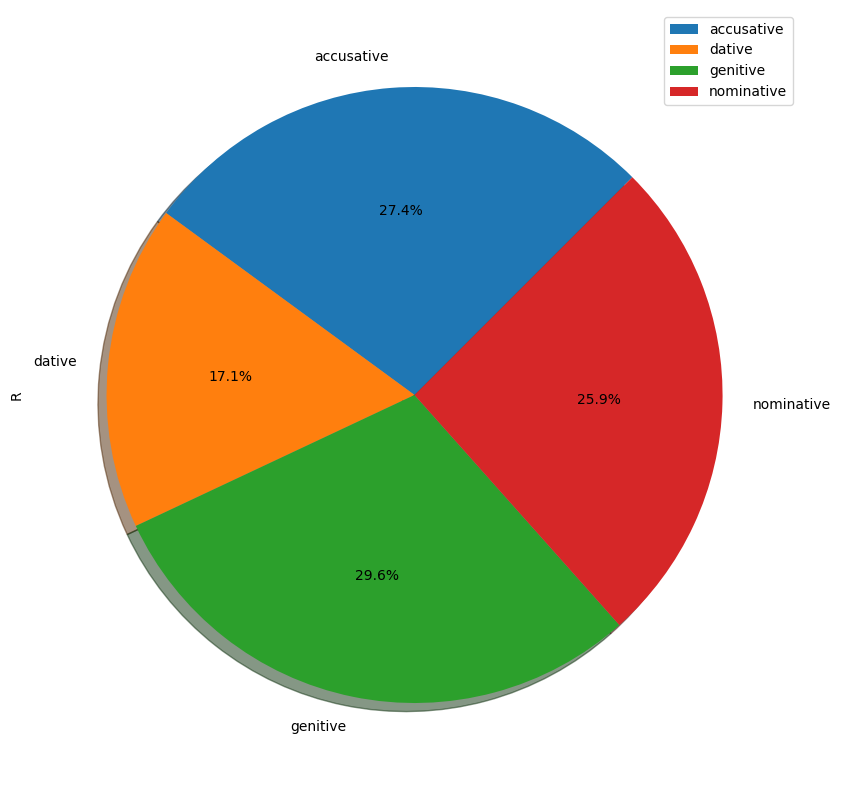

In [8]:
BOL_NConjg_W07.groupby(['bol_case1']).sum().plot(kind='pie', y='R', subplots=True, shadow = True,startangle=45,figsize=(15,10), autopct='%1.1f%%')

In [9]:
BOL_NConjg_W07=BOL_NConjg_W07 \
                                    .groupby([
                                              'bol_case1',
                                              'bol_gn1',
                                              'bol_nu1'
                                             ]) \
                                    .nth((0,1,2,3)) \
                                    .sort_values([
                                                  'bol_case1',
                                                  'bol_gn1',
                                                  'bol_nu1',   
                                                  'bol_monad_num1'],
                                                 ascending=[True,True,True,True])
BOL_NConjg_W07.head(60)

R       S1  S2  S3  NODE1 TYPE1       TEXT1  \
bol_case1  bol_gn1   bol_nu1                                                   
accusative feminine  plural     80  Matthew   3   6    993  word   ἁμαρτίας    
                     plural    104  Matthew   4   2   1237  word     ἡμέρας    
                     plural    122  Matthew   4   8   1356  word      πάσας    
                     plural    123  Matthew   4   8   1358  word  βασιλείας    
                     singular   42  Matthew   2  10    608  word      χαρὰν    
                     singular   49  Matthew   2  13    675  word     μητέρα    
                     singular   52  Matthew   2  14    705  word     μητέρα    
                     singular   65  Matthew   2  20    822  word     μητέρα    
           masculine plural      3  Matthew   1   2     25  word   ἀδελφοὺς    
                     plural      5  Matthew   1  11    167  word   ἀδελφοὺς    
                     plural     34  Matthew   2   4    490  word     πάντας    
                     plural     35  Matthew   2   4    492  word  ἀρχιερεῖς    
                     singular    4  Matthew   1   6     90  word   βασιλέα.    
                     singular   16  Matthew   1  21    351  word       υἱὸν    
                     singular   22  Matthew   1  23    390  word      υἱόν,    
                     singular   27  Matthew   1  25    430  word      υἱόν·    
           neuter    plural     61  Matthew   2  18    792  word      τέκνα    
                     plural     83  Matthew   3   9   1046  word      τέκνα    
                     plural    126  Matthew   4   9   1370  word      πάντα    
                     plural    178  Matthew   5  16   1852  word       καλὰ    
                     singular   17  Matthew   1  21    355  word      ὄνομα    
                     singular   23  Matthew   1  23    394  word      ὄνομα    
                     singular   28  Matthew   1  25    434  word      ὄνομα    
                     singular   43  Matthew   2  11    618  word    παιδίον    
dative     feminine  plural     29  Matthew   2   1    446  word    ἡμέραις    
                     plural     72  Matthew   3   1    897  word    ἡμέραις    
                     plural    379  Matthew   9   4   4280  word   καρδίαις    
                     plural    476  Matthew  11   1   5606  word    πόλεσιν    
                     singular   91  Matthew   3  12   1107  word      χειρὶ    
                     singular  147  Matthew   4  23   1579  word        ὅλῃ    
                     singular  160  Matthew   5   8   1720  word    καρδίᾳ,    
                     singular  189  Matthew   5  19   1924  word   βασιλείᾳ    
           masculine plural    116  Matthew   4   6   1314  word   ἀγγέλοις    
                     plural    169  Matthew   5  12   1772  word  οὐρανοῖς·    
                     plural    176  Matthew   5  15   1835  word      πᾶσιν    
                     plural    181  Matthew   5  16   1862  word  οὐρανοῖς.    
                     singular  107  Matthew   4   4   1270  word       μόνῳ    
                     singular  129  Matthew   4  10   1392  word       μόνῳ    
                     singular  198  Matthew   5  22   1988  word     ἀδελφῷ    
                     singular  199  Matthew   5  22   1999  word     ἀδελφῷ    
           neuter    plural     57  Matthew   2  16    756  word       πᾶσι    
                     plural    303  Matthew   7  11   3289  word    τέκνοις    
                     plural    369  Matthew   8  32   4185  word    ὕδασιν.    
                     plural    431  Matthew  10  18   5162  word   ἔθνεσιν.    
                     singular   87  Matthew   3  11   1076  word      ὕδατι    
                     singular   88  Matthew   3  11   1098  word   Πνεύματι    
                     singular   89  Matthew   3  11   1099  word       Ἁγίῳ    
                     singular   90  Matthew   3  11   1101  word      πυρί·    
genitive   feminine  plural     1

In [10]:
BOL_NConjg_W07.to_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_NTST551-2_Greek/BOL_MorphNoun_Week07.xlsx')

## Translation exercise material

### Week07 translation exercise

In [7]:
TranslateW07 = '''
book book=John
  chapter chapter=1
    verse verse=1|2|4
       word bol_monad_num vocab_ReadGreekIn30Days=3a|3b|4a|4b|5a|5b|6a|6b bol_lemma
'''
TranslateW07 = NA.search(TranslateW07)
NA.table(TranslateW07, start=1, end=40, condensed=True, colorMap={1:'pink'}, extraFeatures={'abc_order', 'bol_case', 'bol_dict_abc', 'bol_frequency_rank', 'bol_gloss', 'bol_gn', 'bol_lemma', 'bol_lemma_dict', 'bol_lexeme_dict', 'bol_lexeme_occurence', 'bol_monad_num', 'bol_mood', 'bol_noun_declension', 'bol_noun_stem', 'bol_noun_type', 'bol_nu', 'bol_person', 'bol_possessor_number', 'bol_psp', 'bol_ref', 'bol_stem', 'bol_suffix', 'bol_surface', 'bol_tense', 'bol_verb_type', 'bol_voice', 'book', 'book_code', 'book_short', 'bookshort', 'case', 'chapter', 'clause', 'declension', 'degree', 'extra', 'freq_lemma', 'gloss', 'gn', 'lemma', 'lemma_translit', 'lexeme_dict', 'mood', 'morph_form', 'morph_functional', 'normalized', 'nu', 'nu_poss', 'orig_order', 'ps', 'sentence', 'sp', 'strongs', 'tense', 'verse', 'vocab_ReadGreekIn30Days', 'voice', 'word'})

  0.18s 36 results


In [35]:
NA.export(TranslateW07, toDir='/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/2_NTST551-2_Greek', toFile='BOL_Translate_W07.tsv')

# Teresa Vocab statistics

In [156]:
pd.set_option('display.max_columns', 60)
words.head()

,orig_order,bol_monad_num,book_long,booknum,book_short,chapter,verse,bol_ref,word,bol_surface,normalized,lemma,bol_lemma,lemma_translit,form_tag,functional_tag,strongs,strongs_unreliable,lexeme_dict,bol_lemma_dict,gloss,bol_gloss,abc_order,bol_dict_abc,freq_lemma,bol_lexeme_occurrences,bol_frequency_rank,sp,bol_psp,gn,bol_gender,nu,bol_number,nu_poss,bol_possessor_number,ps,bol_person,case,bol_case,tense,bol_tense,voice,bol_voice,mood,bol_mood,degree,extra,bol_suffix,bol_verb_type,bol_noun_stem,word_stem,declension,bol_noun_declension,vocab_ReadGreekin30Days
0,1,1,Matthew,1,Matt,1,1,Matt 1:1,Βίβλος,Βίβλος,Βίβλος,βίβλος,βίβλος,biblos,N-NSF,N-NSF,976,False,"βίβλος, -ου, ἡ","βίβλος, -ου, ἡ","written book, roll, or volume","written book, roll, or volume",965,969,10,10,1052,noun,noun,f,feminine,sg,singular,NaN,NaN,NaN,NaN,nom,nominative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,omicron,NaN,2nd,second_d,not_covered
1,2,2,Matthew,1,Matt,1,1,Matt 1:1,γενέσεως,γενέσεως,γενέσεως,γένεσις,γένεσις,genesis,N-GSF,N-GSF,1078,False,"γένεσις, -εως, ἡ","γένεσις, -εως, ἡ","birth, lineage","birth, lineage",1067,1070,5,5,1638,noun,noun,f,feminine,sg,singular,NaN,NaN,NaN,NaN,gen,genitive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,iota,iota,3rd,third_d,not_covered
2,3,3,Matthew,1,Matt,1,1,Matt 1:1,Ἰησοῦ,Ἰησοῦ,Ἰησοῦ,Ἰησοῦς,Ἰησοῦς,Iesous,N-GSM,N-GSM,2424,False,Ἰησοῦς,Ἰησοῦς,Jesus,Jesus,2387,2399,913,913,19,noun,noun,m,masculine,sg,singular,NaN,NaN,NaN,NaN,gen,genitive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,irregular,irregular,irregular,irregular,not_covered
3,4,4,Matthew,1,Matt,1,1,Matt 1:1,Χριστοῦ,Χριστοῦ,Χριστοῦ,Χριστός,Χριστός,Khristos,N-GSM,N-GSM,5547,False,"Χριστός, -οῦ, ὁ","Χριστός, -οῦ, ὁ","anointed, Messiah, Christ","anointed, Messiah, Christ",5326,5358,529,529,35,noun,noun,m,masculine,sg,singular,NaN,NaN,NaN,NaN,gen,genitive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,omicron,NaN,2nd,second_d,not_covered
4,5,5,Matthew,5,Matt,1,1,Matt 1:1,υἱοῦ,υἱοῦ,υἱοῦ,υἱός,υἱός,uios,N-GSM,N-GSM,5207,False,"υἱός, -οῦ, ὁ","υἱός, -οῦ, ὁ","son, descendent","son, descendent",4995,5026,376,376,47,noun,noun,m,masculine,sg,singular,NaN,NaN,NaN,NaN,gen,genitive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,omicron,NaN,2nd,second_d,3b


In [157]:
words.shape

(137779, 54)

In [158]:
len(words)

137779

In [159]:
GreekIn30Days = words[(words['vocab_ReadGreekin30Days'] == '3a') 
                    + (words['vocab_ReadGreekin30Days'] == '3b')
                    + (words['vocab_ReadGreekin30Days'] == '4a')
                    + (words['vocab_ReadGreekin30Days'] == '4b')
                    + (words['vocab_ReadGreekin30Days'] == '5a')                       
                    + (words['vocab_ReadGreekin30Days'] == '5b')
                    + (words['vocab_ReadGreekin30Days'] == '6a')
                    + (words['vocab_ReadGreekin30Days'] == '6b')
                    + (words['vocab_ReadGreekin30Days'] == '6c')
                    + (words['vocab_ReadGreekin30Days'] == '7a')
                    + (words['vocab_ReadGreekin30Days'] == '7b')
                    + (words['vocab_ReadGreekin30Days'] == '7c')
                    + (words['vocab_ReadGreekin30Days'] == '7d')      
                    + (words['vocab_ReadGreekin30Days'] == '8a')
                    + (words['vocab_ReadGreekin30Days'] == '8b')
                    + (words['vocab_ReadGreekin30Days'] == '9a') 
                     ]
GreekIn30Days.shape

(105181, 54)

In [164]:
GreekIn30Days = words[(words['vocab_ReadGreekin30Days'] != 'not_covered')
                     ]
GreekIn30Days.shape

(105181, 54)

In [160]:
len(GreekIn30Days)

105181

In [161]:
PercentageGreekIn30DaysInNT = 100/len(words)*len(GreekIn30Days)
PercentageGreekIn30DaysInNT

76.34037117412667

array([<AxesSubplot:ylabel='orig_order'>], dtype=object)

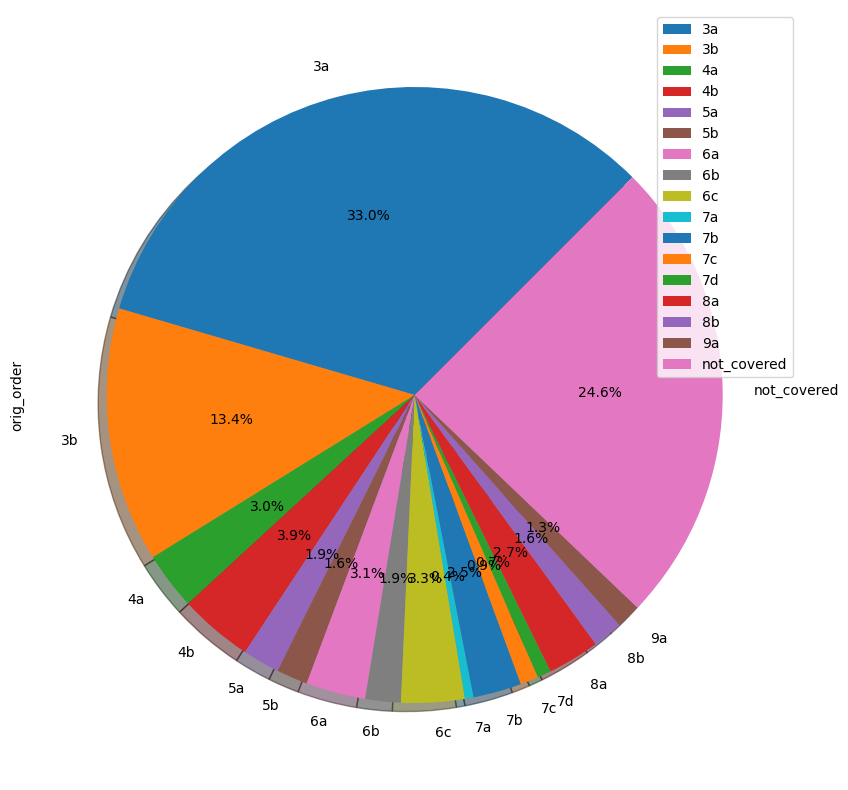

In [162]:
words.groupby(['vocab_ReadGreekin30Days']).sum().plot(kind='pie', y='orig_order', subplots=True, shadow = True,startangle=45,figsize=(15,10), autopct='%1.1f%%')

# Ambigious Form Identification


## Nominal Forms

In [14]:
words=pd.read_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/0_data_NA1904/Nestle1904_source_v1.5_20221004.xlsx')
pd.set_option('display.max_columns', 50)
words.head()

,book_long,booknum,book_short,chapter,verse,bol_ref,orig_order,bol_monad_num,word,bol_surface,normalized,normalized_noaccent,lemma,bol_lemma,lemma_noaccent,lemma_translit,form_tag,functional_tag,strongs,strongs_unreliable,lexeme_dict,bol_lemma_dict,gloss,bol_gloss,abc_order,...,nu_poss,bol_possessor_number,ps,bol_person,case,ambigious_case2,ambigious_case3,bol_case,tense,bol_tense,voice,ambigious_voice2,ambigious_voice3,bol_voice,mood,bol_mood,degree,extra,bol_suffix,bol_verb_type,bol_noun_stem,word_stem,declension,bol_noun_declension,vocab_ReadGreekIn30Days
0,Matthew,1,Matt,1,1,Matt 1:1,1,1,Βίβλος,Βίβλος,Βίβλος,Βιβλος,βίβλος,βίβλος,βιβλος,biblos,N-NSF,N-NSF,976,False,"βίβλος, -ου, ἡ","βίβλος, -ου, ἡ","written book, roll, or volume","written book, roll, or volume",965,...,NaN,NaN,NaN,NaN,nom,NaN,NaN,nominative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,omicron,NaN,2nd,second_d,not_covered
1,Matthew,1,Matt,1,1,Matt 1:1,2,2,γενέσεως,γενέσεως,γενέσεως,γενεσεως,γένεσις,γένεσις,γενεσις,genesis,N-GSF,N-GSF,1078,False,"γένεσις, -εως, ἡ","γένεσις, -εως, ἡ","birth, lineage","birth, lineage",1067,...,NaN,NaN,NaN,NaN,gen,NaN,NaN,genitive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,iota,iota,3rd,third_d,not_covered
2,Matthew,1,Matt,1,1,Matt 1:1,3,3,Ἰησοῦ,Ἰησοῦ,Ἰησοῦ,Ιησου,Ἰησοῦς,Ἰησοῦς,Ιησους,Iesous,N-GSM,N-GSM,2424,False,Ἰησοῦς,Ἰησοῦς,Jesus,Jesus,2387,...,NaN,NaN,NaN,NaN,gen,NaN,NaN,genitive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,irregular,irregular,irregular,irregular,not_covered
3,Matthew,1,Matt,1,1,Matt 1:1,4,4,Χριστοῦ,Χριστοῦ,Χριστοῦ,Χριστου,Χριστός,Χριστός,Χριστος,Khristos,N-GSM,N-GSM,5547,False,"Χριστός, -οῦ, ὁ","Χριστός, -οῦ, ὁ","anointed, Messiah, Christ","anointed, Messiah, Christ",5326,...,NaN,NaN,NaN,NaN,gen,NaN,NaN,genitive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,omicron,NaN,2nd,second_d,not_covered
4,Matthew,1,Matt,1,1,Matt 1:1,5,5,υἱοῦ,υἱοῦ,υἱοῦ,υιου,υἱός,υἱός,υιος,uios,N-GSM,N-GSM,5207,False,"υἱός, -οῦ, ὁ","υἱός, -οῦ, ὁ","son, descendent","son, descendent",4995,...,NaN,NaN,NaN,NaN,gen,NaN,NaN,genitive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,omicron,NaN,2nd,second_d,3b


In [15]:
NF = '''
word bol_case=nominative|gentive|dative|accusative|vocative bol_monad_num bol_surface bol_lemma bol_dict_abc bol_psp bol_gender bol_tense bol_voice bol_noun_stem bol_noun_declension bol_nu normalized normalized_noaccent lemma lemma_noaccent
'''
NF = NA.search(NF)
NA.show(NF, start=1, end=3, condensed=True, colorMap={1:'pink'})

  0.45s 59246 results


In [16]:
NA.export(NF, toDir='/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/0_data_NA1904/feature-dev', toFile='N1904_ambigious_nominal-forms_20221004.tsv')

## Verbal Forms

In [17]:
VF = '''
word bol_psp=verb bol_monad_num bol_surface bol_lemma bol_dict_abc bol_gender bol_tense bol_voice bol_nu bol_verb_type bol_mood bol_person bol_number bol_gender normalized normalized_noaccent lemma lemma_noaccent 
'''
VF = NA.search(VF)
NA.show(VF, start=1, end=3, condensed=True, colorMap={1:'pink'})

  0.51s 28352 results


In [18]:
NA.export(VF, toDir='/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/0_data_NA1904/feature-dev', toFile='N1904_ambigious_verbal-forms_20221004.tsv')